# Ford GoBike Data  - Exploratory Analysis

In our modern age with modern technology and transportation, cars aren't the only way to get around anymore. In addition to things like the rise of scooters like Lime, bike sharing has also become a recent thing in certain geographical locations. Throughout this project, we'll be specifically looking at data related to Ford GoBike. We'll look at gleaning some insights across several observations and looking at them with some data visualizations.

As the name of [Ford GoBike was changed into Bay-Wheels](https://www.nbcbayarea.com/news/local/lyft-rebrands-ford-gobikes-as-baywheels-launches-new-bikes-in-sj/155964/) in April 2019, I will try to tune the data according to baywheels data, and then analyze it.


## Table of Contents


<ul>
<li><a href="#gather">I. Gathering the Data</a></li>
<li><a href="#clean">II. Cleaning the Data</a></li>
<li><a href="#uni">III. Univariate Exploration</a></li>
<li><a href="#bi">IV. Bivariate Exploration</a></li> 
<li><a href="#multi">V. Multivariate Exploration</a></li>
</ul>

In [1]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import requests
from io import BytesIO
from zipfile import ZipFile

<a id='gather'></a>
## Gathering the Data

In this section, we'll be gathering the data. 

We'll be systematically downloading the data from ford and comibine it all together to get some insight from it.

In [ ]:
#Creating the file for storing our data
os.makedirs('lyft-data')

In [ ]:
#Downloading the 2017 dataset separately
url2017 = 'https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv'
response2017 = requests.get(url2017)

with open(os.path.join('lyft-data', url2017.split('/')[-1]), mode = 'wb') as file:
    file.write(response2017.content)

In [ ]:
#Downloading the data after 2017
urls = ['https://s3.amazonaws.com/fordgobike-data/201801-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201802-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201803-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201804-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201805-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201806-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201807-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201808-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201809-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201810-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201811-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201812-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201901-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201902-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201903-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201904-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201910-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201911-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/202001-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/202002-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/202003-baywheels-tripdata.csv.zip']

for url in urls:
    response = requests.get(url)
    zip_file = ZipFile(BytesIO(response.content))
    zip_file.extractall('lyft-data')

### Exploring dataset 
after and before the change of tha name from **Ford Go bike to BayWheels**

#### Ford Go Bike

In [ ]:
#Congregating all the Ford Go Bike datasets
path = r'lyft-data/fordgobike'
raw_dfs = []

for file in os.listdir(path):
    raw_dfs.append(pd.read_csv(path + '/' + file))

In [ ]:
#Combining the datasets together into a single dataframe
df = pd.concat(raw_dfs, sort=False)

In [ ]:
#Saving combined dataframe into a new file 
df.to_csv('lyft-data/fordgobike/fordgobike-combined.csv', index = False)

In [2]:
#Creating the dataframe after combining all dataset 
ford_df = pd.read_csv('lyft-data/fordgobike/fordgobike-combined.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Looking at the first five rows of Ford Go bike data
ford_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988.0,Male,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987.0,Male,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,1986.0,Female,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,1981.0,Male,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,1976.0,Female,Yes


In [4]:
ford_df.shape

(3254325, 16)

In [5]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254325 entries, 0 to 3254324
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 397.3+ MB


In [6]:
ford_df.bike_share_for_all_trip.unique()

array(['No', 'Yes', nan], dtype=object)

#### Observations:
- As we can clearly see, that we have 3254325 rows and 16 columns
- We can see that in the last column, we have missing values.

#### Bay-Wheels

In [ ]:
#Congregating all the Ford Go Bike datasets
path = r'lyft-data/baywheels'
raw_dfs_1 = []

for file in os.listdir(path):
    raw_dfs_1.append(pd.read_csv(path + '/' + file))

In [ ]:
#Combining the datasets together into a single dataframe
df_1 = pd.concat(raw_dfs, sort=False)

In [ ]:
#Saving combined dataframe into a new file 
df_1.to_csv('lyft-data/baywheels/baywheels-combined_1.csv', index = False)

In [7]:
#Creating the dataframe after combining all dataset 
df_baywheels = pd.read_csv('lyft-data/baywheels/baywheels-combined_1.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
#Looking at the first five rows of Bay-wheels data
df_baywheels.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,60863,2019-09-30 11:48:02.7100,2019-10-01 04:42:25.8640,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,No,NaN
1,36019,2019-09-30 16:16:32.3530,2019-10-01 02:16:51.9820,294.0,Pierce Ave at Market St,37.327581,-121.884559,443.0,3rd St at Keyes St,37.320866,-121.876279,163,Customer,No,NaN
2,5615,2019-09-30 23:12:25.9980,2019-10-01 00:46:01.9590,370.0,Jones St at Post St,37.787327,-122.413278,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,No,NaN
3,1482,2019-09-30 23:57:34.6630,2019-10-01 00:22:16.8490,109.0,17th St at Valencia St,37.763316,-122.421904,460.0,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer,No,NaN
4,1272,2019-09-30 23:53:28.6530,2019-10-01 00:14:41.0740,95.0,Sanchez St at 15th St,37.766219,-122.431060,127.0,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,No,NaN


In [9]:
df_baywheels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2541086 entries, 0 to 2541085
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 290.8+ MB


In [10]:
df_baywheels.shape

(2541086, 15)

In [11]:
df_baywheels.rental_access_method.unique()

array([nan, 'app', 'clipper'], dtype=object)

In [12]:
df_baywheels.bike_share_for_all_trip.unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
df_baywheels.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.541086e+06,1.974780e+06,2.541086e+06,2.541086e+06,1.973132e+06,2.541086e+06,2.541086e+06,2.541086e+06
mean,8.179592e+02,1.559452e+02,3.775680e+01,-1.223507e+02,1.504767e+02,3.775600e+01,-1.223470e+02,1.490188e+05
std,1.890798e+03,1.314966e+02,1.823561e-01,4.820733e-01,1.303568e+02,2.629458e-01,7.805483e-01,2.592418e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225758e+02,4.000000e+00
25%,3.710000e+02,5.000000e+01,3.776708e+01,-1.224169e+02,4.300000e+01,3.776719e+01,-1.224148e+02,2.370000e+03
50%,5.910000e+02,1.100000e+02,3.777874e+01,-1.224001e+02,1.040000e+02,3.777877e+01,-1.223993e+02,1.014200e+04
75%,9.190000e+02,2.490000e+02,3.779413e+01,-1.223900e+02,2.450000e+02,3.779423e+01,-1.223900e+02,2.143300e+05
max,9.121100e+05,5.210000e+02,4.551000e+01,0.000000e+00,5.210000e+02,4.551000e+01,0.000000e+00,9.999600e+05


#### Observations:
- We can clearly see a difference in the dataset after the name was changed to Baywheels
    - Where the main difference is missing of **member birth year** and **member gender** from the baywheels dataset
- We can also see there are missing values in the columns: **bike_share_for_all_trip** and **rental_access_method**

<a id='clean'></a>

## Cleaning and Merging the Data of Go Ford bike and Baywheels datasets

As we can see the data os already pretty clean, we will just have to make few adjustments.

In [ ]:
#Congregating all the Ford Go Bike and baywheel datasets
combine_df = []
combine_df.append(pd.read_csv('lyft-data/fordgobike/fordgobike-combined.csv'))
combine_df.append(pd.read_csv('lyft-data/baywheels/baywheels-combined_1.csv'))   

In [ ]:
#Combining the datasets together into a single dataframe
combined_df_1 = pd.concat(combine_df, sort=False)

In [ ]:
#Saving combined dataframe into a new file 
combined_df_1.to_csv('lyft-data/lyft-combined-data.csv', index = False)

In [14]:
#Creating the dataframe after combining all dataset 
df_lyft = pd.read_csv('lyft-data/lyft-combined-data.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
df_lyft.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,rental_access_method
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988.0,Male,No,NaN
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987.0,Male,No,NaN
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,1986.0,Female,No,NaN
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,1981.0,Male,No,NaN
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,1976.0,Female,Yes,NaN


In [16]:
df_lyft.shape

(5795411, 17)

In [17]:
df_lyft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5795411 entries, 0 to 5795410
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
 16  rental_access_method     object 
dtypes: float64(7), int64(2), object(8)
memory usage: 751.7+ MB


#### Converting the 'start_time' and 'end_time' fields to datetime

The dataset gives us some good time stamps; however, they are provdied to us in a string format. Let's go ahead and convert them to the datetime format.

In [18]:
df_lyft['start_time'] = pd.to_datetime(df_lyft['start_time'])
df_lyft['end_time'] = pd.to_datetime(df_lyft['end_time'])

In [19]:
df_lyft[['start_time', 'end_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5795411 entries, 0 to 5795410
Data columns (total 2 columns):
 #   Column      Dtype         
---  ------      -----         
 0   start_time  datetime64[ns]
 1   end_time    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 88.4 MB


#### Adding a 'year-month' field

Now that we've converted our fields above into the datetime format, we'll extract the year and month for each row into its own column, 'year-month.'


In [20]:
df_lyft['year-month'] = pd.to_datetime(df_lyft['start_time']).dt.to_period('M')

In [21]:
df_lyft['year-month'].sample(5)

3552733    2019-07
2345223    2018-07
1886505    2018-12
2894752    2018-03
2598708    2018-08
Name: year-month, dtype: period[M]

#### Dropping Columns

The following columns are being dropped for the following reasons:

 - **'start_station_id', 'start_station_latitude', and 'start_station_longitude'**: We'll keep start_station_name, but beyond the name, we don't have a much a use for the other fields.
 - **'end_station_id', 'end_station_latitude', and 'end_station_longitude'**: Same reason as the one above
 
 - **'member_gender' and 'member_birth_year'** from Ford Go bike data set, as they are not included in the dataset of baywheels data set
 - **'rental_access_method'** column from the baywheels data set as it is not available in the dataset of Ford Go Bike dataset

In [22]:
columns_to_drop = ['start_station_id', 'start_station_latitude', 'start_station_longitude',
                   'end_station_id', 'end_station_latitude', 'end_station_longitude','member_gender',
                   'member_birth_year', 'rental_access_method' ]

df_lyft.drop(columns = columns_to_drop, inplace = True)

In [23]:
df_lyft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5795411 entries, 0 to 5795410
Data columns (total 9 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_name       object        
 4   end_station_name         object        
 5   bike_id                  int64         
 6   user_type                object        
 7   bike_share_for_all_trip  object        
 8   year-month               period[M]     
dtypes: datetime64[ns](2), int64(2), object(4), period[M](1)
memory usage: 397.9+ MB


In [24]:
df_lyft['bike_share_for_all_trip'].fillna('None', inplace = True)


In [25]:
df_lyft['bike_share_for_all_trip'].unique()

array(['No', 'Yes', 'None'], dtype=object)

### Saving Clean Master Dataset

Now that we've finished our cleaning, let's save it into a master dataset for later use.

In [26]:
#Saving the clean master dataset
df_lyft.to_csv('lyft-data/lyft-master.csv', index = False)

In [2]:
#Rebuilding our dataframe from the master CSV file
df_lyft = pd.read_csv('lyft-data/lyft-master.csv')

<a id='uni'></a>

## Univariate Exploration

Let's begin by looking at a handful of univariate visualizations in this section of the notebook.

#### How long are people riding these bikes?

In this first analysis, we see a distribution of how long people are using these bikes in seconds. Because some outliers on the high end extremely skewed the data, I set a top limit of 2000 seconds. It's still right-skewed here, but at least we can see that the peak usage falls in that 250 - 750 second range, or more precisely, about 275 seconds. This is about ~4.5 minutes, so generally speaking, people are using these bikes for quick rides.

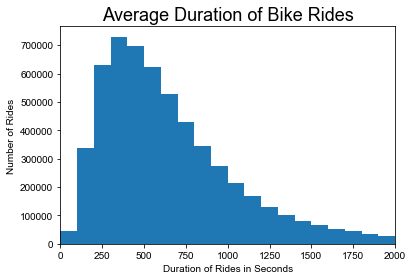

In [3]:
#Visualizing the data in a histogram
duration_bins = np.arange(0, df_lyft['duration_sec'].max() + 100, 100)
plt.hist(data = df_lyft, x = 'duration_sec', bins = duration_bins);

plt.xlim(0, 2000);
plt.style.use('seaborn')
plt.title('Average Duration of Bike Rides', fontsize = 18);
plt.xlabel('Duration of Rides in Seconds');
plt.ylabel('Number of Rides');
plt.style.use('seaborn');

In [4]:
#Creating dataframe 'gobike_df_membersonly' to only reflect records that contain age values
df_lyft_membersonly = df_lyft.dropna()

#### How many members vs. non-members do we have?

As noted in the previous visualization, not all people are members of this Ford GoBike program. Let's do a quick analysis of number of members vs. number of non-members. We'll do this in both an absolute count form and relative frequency form. In this, we get a clear picture that there are definitely far more members than non-members.

In [5]:
#Determining number of members and non-members
n_members = df_lyft_membersonly.shape[0]
n_nonmembers = df_lyft.shape[0] - n_members
print('Number of members: {}'.format(n_members))
print('Number of non-members: {}'.format(n_nonmembers))

Number of members: 5126330
Number of non-members: 669081


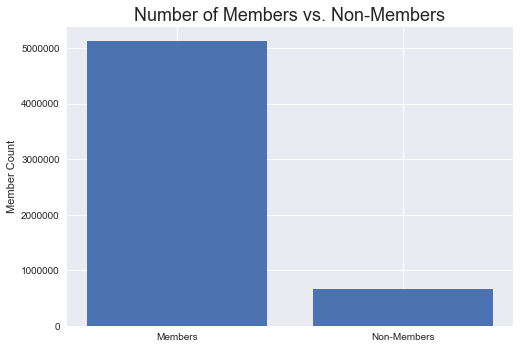

In [6]:
#Visualizing number of members vs. non-members in a pure count form
plt.bar(x = ['Members', 'Non-Members'], height = [n_members, n_nonmembers]);
plt.title('Number of Members vs. Non-Members', fontsize = 18);
plt.ylabel('Member Count');
plt.style.use('seaborn')

In [7]:
#Determining ratios of members vs. non-members
member_percentage = n_members / df_lyft.shape[0]
nonmember_percentage = n_nonmembers / df_lyft.shape[0]
print('Ratio of members: {}'.format(member_percentage))
print('Ratio of non-members: {}'.format(nonmember_percentage))

Ratio of members: 0.8845498619511196
Ratio of non-members: 0.1154501380488804


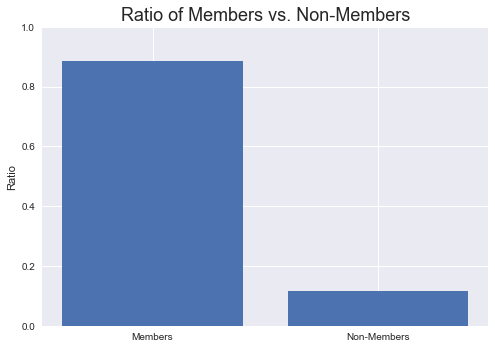

In [8]:
#Visualizing ratios of members vs. non-members
plt.bar(x = ['Members', 'Non-Members'], height = [member_percentage, nonmember_percentage]);
plt.title('Ratio of Members vs. Non-Members', fontsize = 18);
plt.ylabel('Ratio');
plt.ylim(0,1);
plt.style.use('seaborn')

#### Number of Rides Per Month

And to wrap up this section, I'm curious to see if rides have generally gone up over time. Because my laptop had a difficult time chugging through the full dataset, I took a sample of 100000 records. I ran this a couple of times, and this general visualization appeared every time. What we find is that typically there are a larger number of rides in the summer than there are in the winter months.

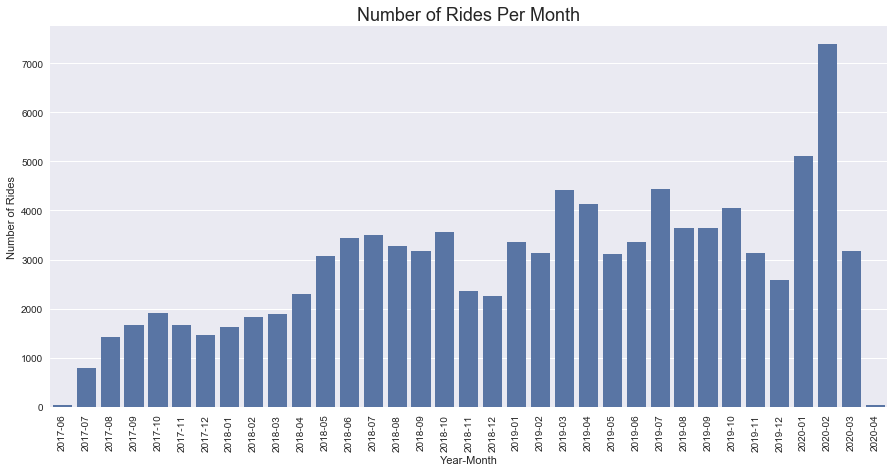

In [9]:
#Visualizing the data with a sample of 100000 records
plt.figure(figsize = (15, 7))
base_color = sb.color_palette()[0]
df_lyft_samp = df_lyft.sample(100000)
sb.countplot(data = df_lyft_samp.sort_values(by='year-month'), x = 'year-month', color = base_color);
plt.title('Number of Rides Per Month', fontsize = 18);
plt.xlabel('Year-Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation = 90);
plt.style.use('seaborn')

<a id='bi'></a>
## Bivariate Exploration

Now that we've taken a look at some univariate explorations, let's take a look at some bivariate visualizations.

#### Do people tend to take longer rides given the month of the year?

Living in the Midwest, I know that bike sharing would significantly decline in colder months. I'm curious if the same holds true even in these warmer climates. And interestingly enough, the data seems to verify that that holds true even for California!

In [ ]:
#Visualizing the data in a point plot
plt.figure(figsize = (15, 7))
sb.pointplot(data = df_lyft_membersonly.sort_values(by='year-month'), x = 'year-month', y = 'duration_sec');
plt.xticks(rotation = 90);
plt.title('Average Ride Time Per Month', fontsize = 18);
plt.ylabel('Average Duration in Seconds');
plt.xlabel('Year-Month');
plt.style.use('seaborn')

#### How long did people ride bikes from the five most frequently visited stations?
From the five most frequently visited places to start a bike ride, I was curious to see how long these bike rides tended to last. What I found, sort of unsurprisingly, is they all landed around that average ride time of about 600 seconds. What is interesting, however, is that the distribution is a fair bit wider for the fifth station listed, San Franscisco Ferry Building. Not living in San Franscisco myself, it's hard to tell why that is, but I'm sure locals might have some insight onto why that may be.

In [ ]:
#Figuring out which stations are the ones most frequently visited and building a dataframe off of them
top_starts = df_lyft['start_station_name'].value_counts().index[:5]
df_lyft_stations = df_lyft.loc[df_lyft['start_station_name'].isin(top_starts)]

In [ ]:
#Visualizing the data in a boxplot
base_color = sb.color_palette()[0]
plt.figure(figsize = (15,7))
sb.boxplot(data = df_lyft_stations, x = 'start_station_name', y = 'duration_sec', color = base_color);
plt.xticks(rotation = 45);
plt.ylim(0, 2500);
plt.title('Duration of Bike Rides from Top 5 Visited Stations', fontsize = 18);
plt.xlabel('Station Names');
plt.ylabel('Duration of Rides')

plt.style.use('seaborn')

<a id='multi'></a>
## Multivariate Exploration

Finally, let's wrap up this notebook with a multivariate explorations.

#### Which type of user tends to take  longer rides in a specific month.

In this next visualization, we'll use some user type distinctive markers to determine how long rides tend to be across the user type. Not surprisingly, the durations for the subscriber shows that they are tend to take longer rides.

In [ ]:
#Visualizing the data in an adapted scatterplot with a sample size of 250000 records
df_lyft_mo_samp = df_lyft_membersonly.sample(250000)

plt.figure(figsize = (15,7))

cat_markers = [['Subscriber', 's'],
               ['Customer', '^']]

for cat, marker in cat_markers:
    df_user_type = df_lyft_mo_samp[df_lyft_mo_samp['user_type'] == cat]
    plt.scatter(data = df_user_type, x = 'year-month', y = 'duration_sec', marker = marker, alpha = .5);
plt.legend(['Subscriber', 'Customer']);
plt.xticks(rotation = 90);
plt.ylim(0, 50000);
plt.title('Comparing Ride Duration Across Year-Months and User_type', fontsize = 18);
plt.xlabel('Year-Month');
plt.ylabel('Number of Rides');
plt.style.use('seaborn')